In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from datetime import datetime

now_time = datetime.now()
start_time = datetime(now_time.year - 20, now_time.month , now_time.day)
now_time
start_time


In [2]:
now_time = datetime.now()
start_time = datetime(now_time.year - 25, now_time.month , now_time.day)
now_time
start_time

datetime.datetime(1995, 1, 11, 0, 0)

In [3]:
stock_df = web.DataReader('AAPL','yahoo', start_time, now_time)

In [4]:
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

sp_df=web.DataReader('^GSPC','yahoo', start_time, now_time)    

In [5]:
sp_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049
2020-01-09,3275.580078,3263.669922,3266.030029,3274.699951,3638390000,3274.699951
2020-01-10,3282.989990,3260.860107,3281.810059,3265.350098,1631680402,3265.350098


In [6]:
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [7]:
# Get the Adjusted Close Price

df = stock_df[['Adj Close']]
#Take a look at the new data
df.head() 

#df.to_csv('data_stocks.csv')

,Adj Close
Date,
1995-01-11,1.436337
1995-01-12,1.394092
1995-01-13,1.378730
1995-01-16,1.367209
1995-01-17,1.382571


In [8]:
df.tail() 

,Adj Close
Date,
2020-01-06,299.799988
2020-01-07,298.390015
2020-01-08,303.190002
2020-01-09,309.630005
2020-01-10,310.329987


In [9]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
#df['InitialPrediction'] = df[['Adj Close']].shift()
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
df.head(30) 

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Adj Close,Prediction
Date,,
1995-01-11,1.436337,1.238112
1995-01-12,1.394092,1.201527
1995-01-13,1.378730,1.178421
1995-01-16,1.367209,1.216931
1995-01-17,1.382571,1.232336
1995-01-18,1.401773,1.232336
1995-01-19,1.409454,1.240037
1995-01-20,1.309602,1.224633
1995-01-23,1.298080,1.180346


In [10]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [11]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[  1.43633747]
 [  1.39409244]
 [  1.37873042]
 ...
 [261.77999878]
 [266.36999512]
 [264.29000854]]


In [12]:
df.head()

,Adj Close,Prediction
Date,,
1995-01-11,1.436337,1.238112
1995-01-12,1.394092,1.201527
1995-01-13,1.378730,1.178421
1995-01-16,1.367209,1.216931
1995-01-17,1.382571,1.232336


In [13]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [14]:
## Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y[:-forecast_out])




[  1.23811162   1.20152676   1.17842102 ... 261.77999878 266.36999512
 264.29000854]


In [15]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [16]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9839434195749707


In [18]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)


lr confidence:  0.9865907993381122


In [20]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast) 

[[267.83999634]
 [267.25      ]
 [264.16000366]
 [259.45001221]
 [261.73999023]
 [265.57998657]
 [270.70999146]
 [266.92001343]
 [268.48001099]
 [270.76998901]
 [271.45999146]
 [275.1499939 ]
 [279.85998535]
 [280.41000366]
 [279.73999023]
 [280.01998901]
 [279.44000244]
 [284.        ]
 [284.26998901]
 [289.91000366]
 [289.79998779]
 [291.51998901]
 [293.6499939 ]
 [300.3500061 ]
 [297.42999268]
 [299.79998779]
 [298.39001465]
 [303.19000244]
 [309.63000488]
 [310.32998657]]


# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
#x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast[0])

In [21]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
lr_pdf=pd.DataFrame(lr_prediction)
lr_pdf

[276.16658542 275.55833585 272.37274161 267.51703306 269.87785813
 273.83665577 279.12537207 275.2181402  276.82640076 279.18722583
 279.89857547 283.70273873 288.55844728 289.12548199 288.43473977
 288.72340112 288.12547099 292.82654516 293.10488706 298.91939174
 298.80597222 300.57918661 302.7750893  309.68238561 306.67203319
 309.11535091 307.6617562  312.61024538 319.24948778 319.97112541]


,0
0,276.166585
1,275.558336
2,272.372742
3,267.517033
4,269.877858
5,273.836656
6,279.125372
7,275.218140
8,276.826401
9,279.187226


In [22]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [23]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [24]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [25]:
#Error 
from sklearn.metrics import mean_squared_error,r2_score
#df['InitialPrediction'] = df[['Adj Close']].shift()
Y_orginal= np.array(df.drop(['Prediction'],1))
Y_true=Y_orginal[-30:]
Y_pred=lr_prediction
#mean_squared_error(Y_orginal[-30:], lr_prediction)
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
MSE 

rmse=r2_score(Y_true, Y_pred)
rmse

0.6333350967358082

In [26]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction) 

[213.35753215 238.09629777 309.82069183 269.38169174 287.84063026
 297.98646069 145.83973853 252.12759923 189.537102   145.37474172
 141.56908515 138.43369088 138.42376809 138.42376797 138.42376814
 138.42376803 138.4237684  138.42376794 138.42376794 138.42376794
 138.42376794 138.42376794 138.42376794 138.42376794 138.42376794
 138.42376794 138.42376794 138.42376794 138.42376794 138.42376794]


In [27]:
dt=datetime.today().strftime('%Y-%m-%d')

df.tail(30) 
new_df= df.tail(30) 
new_df['Prediction']=lr_prediction

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
new_df.head()


,Adj Close,Prediction
Date,,
2019-11-27,267.839996,276.166585
2019-11-29,267.250000,275.558336
2019-12-02,264.160004,272.372742
2019-12-03,259.450012,267.517033
2019-12-04,261.739990,269.877858


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
 
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), new_df['Adj Close']);
ax.plot(x.strftime("%b-%d"), new_df['Prediction']); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')

([<matplotlib.axis.XTick at 0x1323c5c18>,
 <a list of 30 Text xticklabel objects>)

In [30]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Sort DataFrame by date
df = df.sort_values('Adj Close')
# df = df.reset_index()
# Double check the result
df.head()


,Adj Close,Prediction
Date,,
1997-12-23,0.402033,0.574888
1997-07-02,0.405918,0.714726
1997-12-24,0.407860,0.596252
1997-12-29,0.407860,0.590426
1997-12-31,0.407860,0.605963


In [36]:
from datetime import date
from datetime import datetime
from datetime import timedelta
today = str(datetime.now())
last_30_days = datetime.now() - timedelta(days=30)
last_30_days = str(last_30_days)

In [37]:

dates = df.loc[last_30_days : today]
dates

,Adj Close,Prediction
Date,,
2019-12-13,275.149994,283.702739
2019-12-20,279.440002,288.125471
2019-12-18,279.739990,288.434740
2019-12-16,279.859985,288.558447
2019-12-19,280.019989,288.723401
2019-12-17,280.410004,289.125482
2019-12-23,284.000000,292.826545
2019-12-24,284.269989,293.104887
2019-12-27,289.799988,298.805972


In [41]:
# plt.figure(figsize = (18,9))

dates.plot(kind = 'line')
# plt.plot(range(df.shape[0]),(df['Adj Close'])
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel[('Adj Close',fontsize=18)
plt.ylabel('Predictions',fontsize=18)
plt.show()

SyntaxError: invalid syntax (<ipython-input-41-5d8e1659c1bc>, line 6)

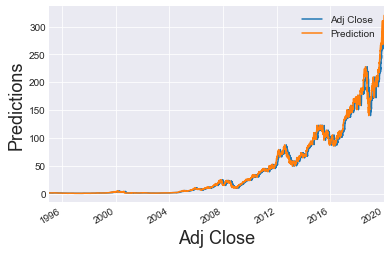

In [39]:
df.plot(kind = 'line')
# plt.plot(range(df.shape[0]),(df['Adj Close'])
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Adj Close',fontsize=18)
plt.ylabel('Predictions',fontsize=18)
plt.show()